In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

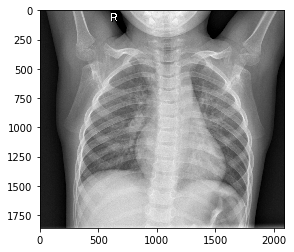

In [10]:
#DATADIR = "training_set"
DATADIR = "dataset/train"

CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break 
    break 

In [3]:
print(img_array)
print(img_array.shape)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]
(375, 500)


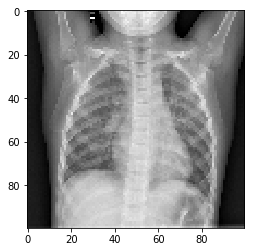

In [11]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(Training data: len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [00:56<00:00, 68.16it/s]


5216


In [13]:
import random

random.shuffle(training_data)

In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[10]
   [31]
   [46]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 1]
   [22]
   [40]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [13]
   [34]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [9]:
# load to current script, or a totally new one

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

In [16]:
DATADIR = "dataset/test"

test_data = []

def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our test_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print('Test data : ',len(test_data))

import random

random.shuffle(test_data)

X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:05<00:00, 77.31it/s]


Test data :  624
[[[[32]
   [34]
   [35]
   ...
   [45]
   [44]
   [39]]

  [[35]
   [34]
   [36]
   ...
   [41]
   [45]
   [53]]

  [[45]
   [74]
   [87]
   ...
   [73]
   [89]
   [84]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import *

import matplotlib.pyplot as plt

# import data from pickle file
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# just using a part of data
#X = X[:int(0.6*len(X))]
#y = y[:int(0.6*len(y))]

# if using categorical_crossentropy loss
from keras.utils import to_categorical
y = to_categorical(y)

# normalization
X = X/255.0

# build network
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(50, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.25))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

# set hyperparameter
batch_size = 100
epochs = 10
validation_split = 0.2


# compile the model
optimizer = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# fit to training data
training = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

# evaluate on test data
#model.evaluate(test_data, test_labels, batch_size=10)

# extract the history f
history = training.history

# plot the training loss and validation loss
plt.figure(1)
plt.title('Training loss and validation loss')
plt.plot(history['loss'], label='training')
plt.plot(history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.figure(2)
plt.title('Training accuracy and validation accuracy')
plt.plot(history['acc'], label='training')
plt.plot(history['val_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# save model network
model.save('CNN_chest.model')
print("Model saved as CNN_chest.model")
model.summary()

